In [1]:
#importing the libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('temp.csv',names=range(0,25),header=0)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6/30/2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2,6/30/2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3,6/30/2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4,6/30/2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5,6/30/2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


This is the type of multi target dataset ,in which we have to predict the 23rd and 24th column i.e Tmax(max temp for the day) and Tmin(min temprature for the day), so here we will first predict Tmin given Tmax .
In second part we will be predicting Tmax given Tmin. So for the prediction we will be using the Linear Regression model.

EDA PROCESS

In [6]:
df.drop(0,axis=1,inplace=True)

In [7]:
df.drop(1,axis=1,inplace=True)

In [8]:
df.head()

,2,3,4,5,6,7,8,9,10,11,...,15,16,17,18,19,20,21,22,23,24
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [9]:
df.shape  #shape of the dataset

(1174, 23)

In [10]:
df.dtypes   #datatypes of the column

2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       1161 non-null   float64
 1   3       1161 non-null   float64
 2   4       1174 non-null   float64
 3   5       1174 non-null   float64
 4   6       1174 non-null   float64
 5   7       1174 non-null   float64
 6   8       1174 non-null   float64
 7   9       1174 non-null   float64
 8   10      1174 non-null   float64
 9   11      1174 non-null   float64
 10  12      1174 non-null   float64
 11  13      1174 non-null   float64
 12  14      1174 non-null   float64
 13  15      1174 non-null   float64
 14  16      1174 non-null   float64
 15  17      1174 non-null   float64
 16  18      1174 non-null   float64
 17  19      1174 non-null   float64
 18  20      1174 non-null   float64
 19  21      1174 non-null   float64
 20  22      1174 non-null   float64
 21  23      1171 non-null   float64
 22  

In [12]:
df[2]=df[2].fillna(df[2].mean())

In [13]:
df[3]=df[3].fillna(df[3].mean())

In [14]:
df[23]=df[23].fillna(df[23].mean())

In [15]:
df[24]=df[24].fillna(df[24].median())

In [16]:
df.head()

,2,3,4,5,6,7,8,9,10,11,...,15,16,17,18,19,20,21,22,23,24
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       1174 non-null   float64
 1   3       1174 non-null   float64
 2   4       1174 non-null   float64
 3   5       1174 non-null   float64
 4   6       1174 non-null   float64
 5   7       1174 non-null   float64
 6   8       1174 non-null   float64
 7   9       1174 non-null   float64
 8   10      1174 non-null   float64
 9   11      1174 non-null   float64
 10  12      1174 non-null   float64
 11  13      1174 non-null   float64
 12  14      1174 non-null   float64
 13  15      1174 non-null   float64
 14  16      1174 non-null   float64
 15  17      1174 non-null   float64
 16  18      1174 non-null   float64
 17  19      1174 non-null   float64
 18  20      1174 non-null   float64
 19  21      1174 non-null   float64
 20  22      1174 non-null   float64
 21  23      1174 non-null   float64
 22  

In [18]:
df.describe()  #from the below we can infer thatoutliers is present in the dataset andalso some of the columns is skewed as
                #the mean is greater than median and vice versa

,2,3,4,5,6,7,8,9,10,11,...,15,16,17,18,19,20,21,22,23,24
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,...,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,29.369423,24.002842,64.235823,91.916192,29.681016,24.604457,8.195586,55.529949,0.486781,0.444572,...,0.999891,0.153153,0.302918,37.544738,126.991418,61.890950,1.257531,5541.038383,29.739795,23.878620
std,2.602485,1.662833,13.489058,4.745852,2.333962,1.632276,2.149672,29.385631,0.263535,0.251106,...,2.989433,0.697887,1.354846,0.050371,0.079466,54.285644,1.370610,269.775914,2.694142,1.745166
min,22.400000,17.900000,36.725609,72.999237,23.356801,19.547129,3.881777,5.404379,0.010504,0.041394,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4915.099121,21.800000,17.800000
25%,27.300000,23.000000,53.355758,88.935202,27.938662,23.433362,6.575176,33.997186,0.244614,0.249417,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,5336.199463,27.600000,22.800000
50%,29.500000,23.900000,62.772331,92.951103,29.868271,24.528913,8.016858,48.732100,0.491930,0.383117,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5600.113525,30.000000,23.800000
75%,31.400000,25.000000,74.703930,95.347256,31.397960,25.629129,9.440780,75.052564,0.715715,0.639965,...,0.246237,0.016469,0.000000,37.577600,127.042000,59.832400,1.767800,5779.089233,31.800000,25.000000
max,35.500000,28.400000,95.818939,99.985825,35.572714,28.190031,18.043690,153.779546,0.951899,0.966637,...,21.621661,7.299312,12.216177,37.645000,127.135000,212.335000,5.178200,5992.895996,36.000000,28.300000


In [323]:
#Data visualisation

In [324]:
from matplotlib import pyplot as plt
import seaborn as sns

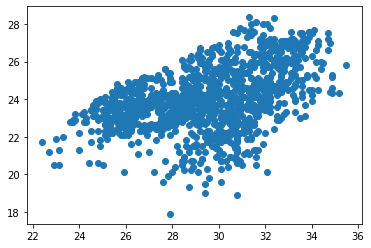

In [325]:
plt.scatter(df[2],df[3])     # present tmax and tmin

In [326]:
df.head()

,2,3,4,5,6,7,8,9,10,11,...,15,16,17,18,19,20,21,22,23,24
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


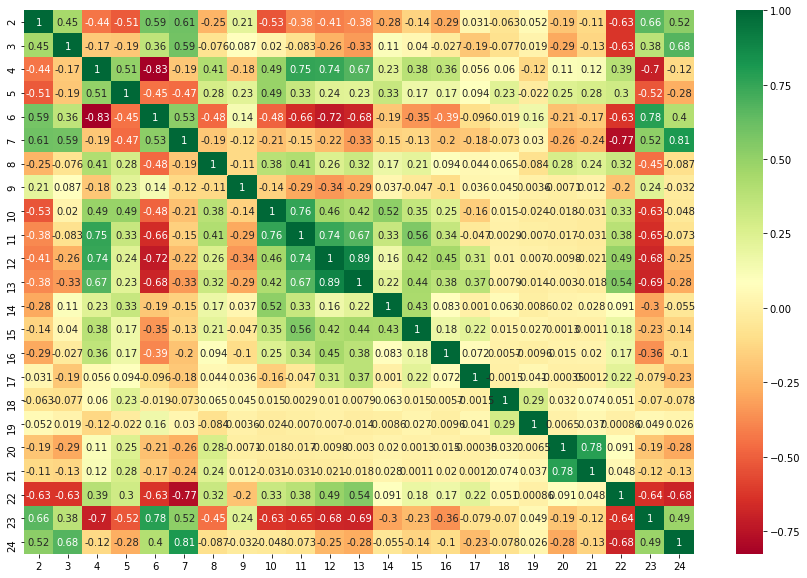

In [327]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [328]:
# we can see from the above that most of the values are positively correlated among each other as shown above.

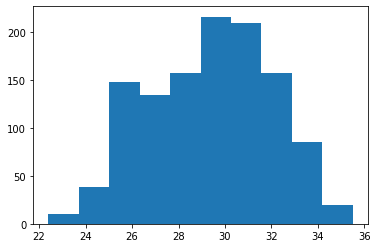

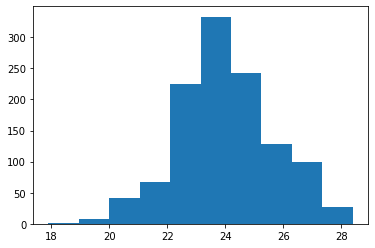

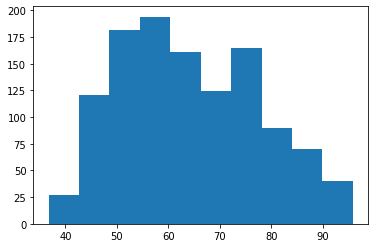

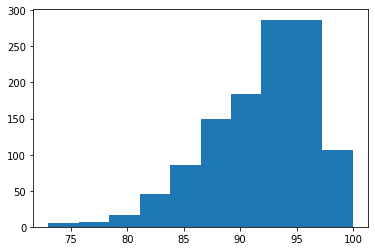

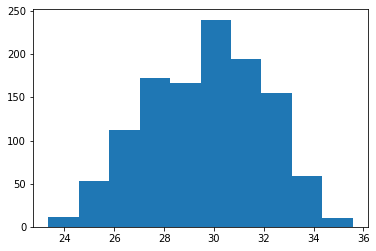

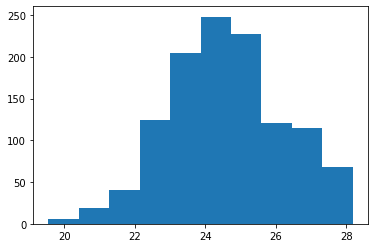

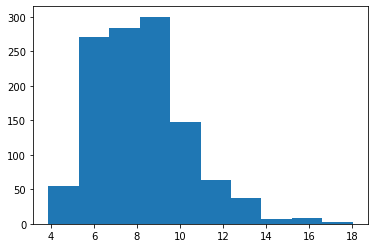

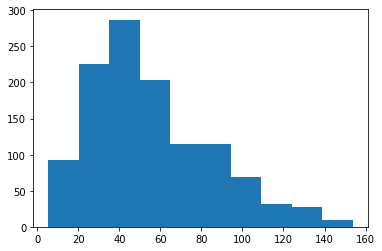

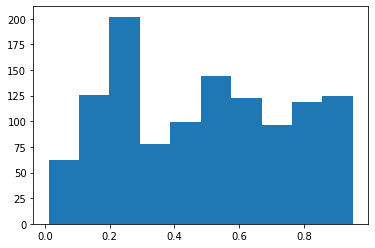

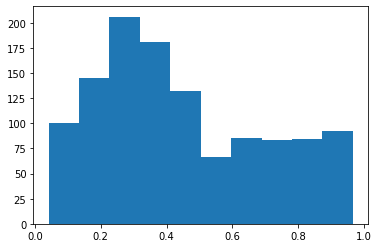

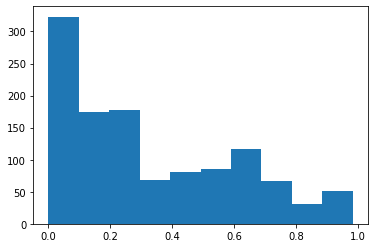

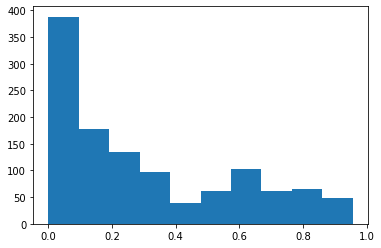

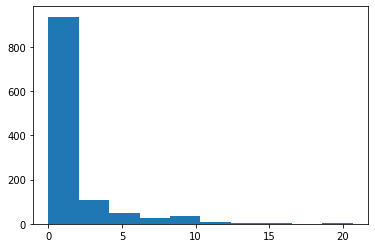

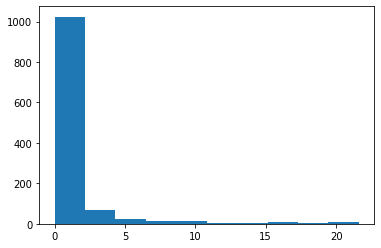

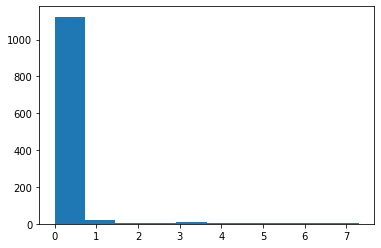

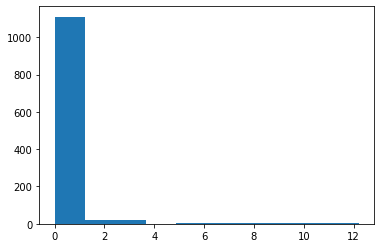

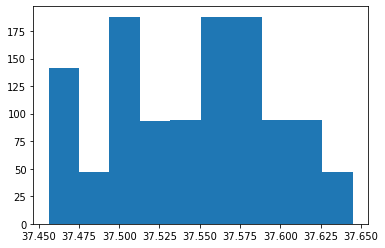

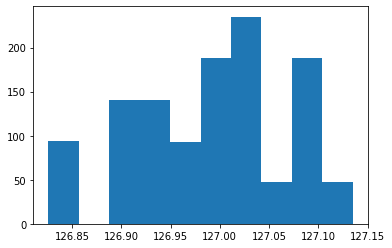

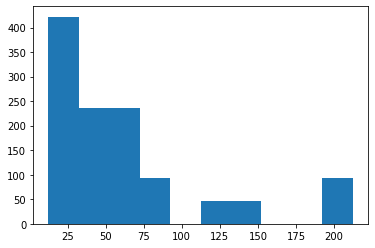

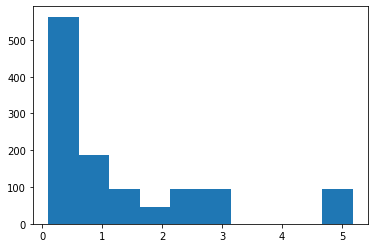

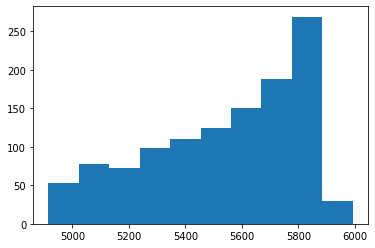

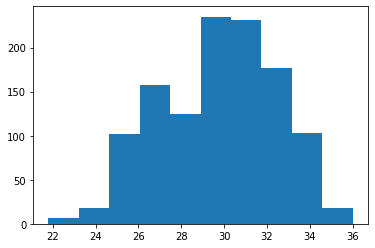

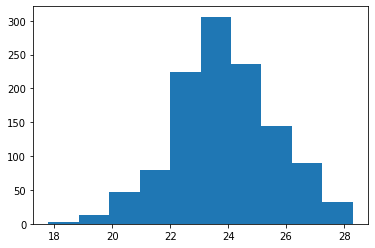

In [329]:
for i in df.columns:
    plt.figure()
    plt.hist(df[i])

In [330]:
#from the above plotted histograms we can infer that most of the values are following the gaussian curve and other are skewed

In [331]:
df.skew()

2    -0.133980
3     0.003427
4     0.285245
5    -0.805658
6    -0.126687
7    -0.006915
8     0.860014
9     0.812768
10    0.087659
11    0.471269
12    0.671039
13    0.721428
14    2.870734
15    4.312687
16    6.576195
17    6.116360
18    0.086012
19   -0.286187
20    1.724830
21    1.563890
22   -0.545589
23   -0.239648
24    0.004099
dtype: float64

In [407]:
df[14]=np.power(df[14],1/3)   #removing skewness from the columns using cuberoot
df[14].skew()

0.17196344965890703

In [408]:
df[15]=np.power(df[15],1/3)
df[15].skew()

0.6011222512166354

In [409]:
df[16]=np.power(df[16],1/3)
df[16].skew()

1.053243846810621

In [417]:
df[17]=np.power(df[17],1/3)
df[17].skew()

1.268182376807664

In [336]:
df[20]=np.power(df[20],1/3)
df[20].skew()

0.9202165263496707

In [337]:
df[21]=np.power(df[21],1/3)
df[21].skew()

0.6134568690478929

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       1174 non-null   float64
 1   3       1174 non-null   float64
 2   4       1174 non-null   float64
 3   5       1174 non-null   float64
 4   6       1174 non-null   float64
 5   7       1174 non-null   float64
 6   8       1174 non-null   float64
 7   9       1174 non-null   float64
 8   10      1174 non-null   float64
 9   11      1174 non-null   float64
 10  12      1174 non-null   float64
 11  13      1174 non-null   float64
 12  14      1174 non-null   float64
 13  15      1174 non-null   float64
 14  16      1174 non-null   float64
 15  17      1174 non-null   float64
 16  18      1174 non-null   float64
 17  19      1174 non-null   float64
 18  20      1174 non-null   float64
 19  21      1174 non-null   float64
 20  22      1174 non-null   float64
 21  23      1174 non-null   float64
 22  

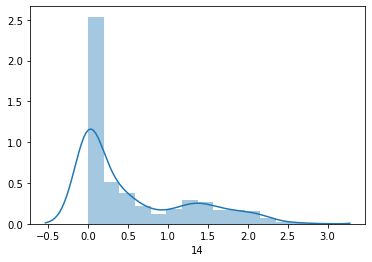

In [339]:
sns.distplot(df[14])

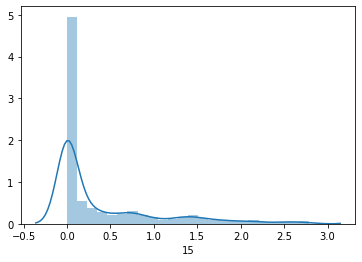

In [340]:
sns.distplot(df[15])

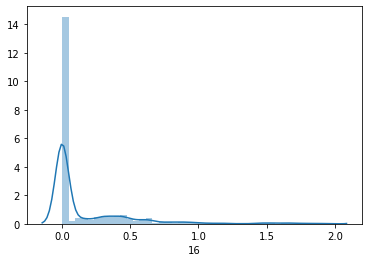

In [341]:
sns.distplot(df[16])

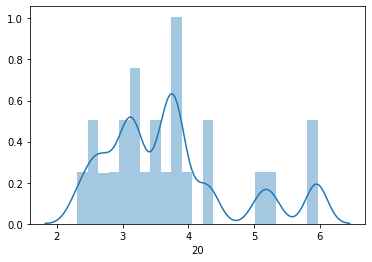

In [342]:
sns.distplot(df[20])

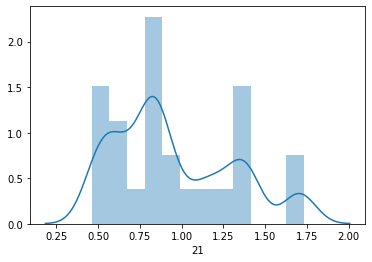

In [343]:
sns.distplot(df[21])

<Figure size 720x1080 with 0 Axes>

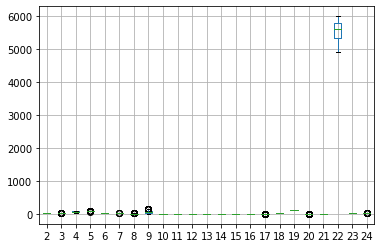

<Figure size 720x1080 with 0 Axes>

In [420]:
df.boxplot()
plt.figure(figsize=(10,15))    #shows outliers in the dataset

In [421]:
#removing outliers from the dataset

In [422]:
from scipy.stats import zscore

In [423]:
z=np.abs(zscore(df))

In [424]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   18,   22,   23,   24,   25,   44,   50,   50,   53,
         59,   75,   86,   90,  194,  344,  375,  394,  494,  519,  544,
        569,  575,  594,  616,  661,  670,  674, 1004, 1006, 1016, 1056],
      dtype=int64), array([ 3,  3,  3,  3,  3,  3,  6,  6,  5, 22,  5,  5,  1,  1,  1,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  7,  3,  3,  3,  7,  7,  7,  7],
      dtype=int64))


In [425]:
df_new=df[(z<3).all(axis=1)]

In [426]:
df_new.shape   #shape of the dataset after removing outliers

(1142, 23)

In [427]:
df.shape   #original shape of the dataset

(1174, 23)

In [428]:
#splitting the dataset in x and y 

In [429]:
x=df.drop(24,axis=1)

In [430]:
y=df[24].values
y=y.reshape(-1,1)

In [431]:
x.shape

(1174, 22)

In [432]:
y.shape

(1174, 1)

In [433]:
#now we reduce the dimension of the dataset using dimensionality reduction technique(pca)

In [434]:
from sklearn.decomposition import PCA

In [435]:
pca=PCA(n_components=9)

In [436]:
x=pca.fit_transform(x)
x=pd.DataFrame(data=x)
x.head()

,0,1,2,3,4,5,6,7,8
0,-451.219153,24.710309,14.196015,2.068167,-1.228815,0.165035,1.550188,0.794460,-0.868394
1,-327.925214,4.754877,19.039146,1.085001,-2.264812,2.939161,0.809841,1.927395,-0.214706
2,-322.755147,-26.744759,25.291680,4.794887,-1.212568,1.784348,-0.523924,0.999882,-0.866170
3,-315.412311,18.150101,11.293817,-2.243573,-3.145827,5.439239,0.008306,0.716744,-1.469191
4,-316.997705,60.117683,12.226835,5.199109,-2.275422,1.467591,0.513076,0.720934,-0.180484


In [437]:
#now we will use scaling technique to standardize the dataset

In [438]:
from sklearn.preprocessing import StandardScaler

In [439]:
std=StandardScaler()

In [440]:
x=std.fit_transform(x)
x=pd.DataFrame(data=x)
x.head()

,0,1,2,3,4,5,6,7,8
0,-1.672406,0.856783,1.114309,0.539200,-0.616635,0.089433,1.140436,0.594989,-0.846405
1,-1.215427,0.164866,1.494467,0.282875,-1.136512,1.592735,0.595781,1.443470,-0.209270
2,-1.196265,-0.927324,1.985257,1.250095,-0.608482,0.966941,-0.385438,0.748834,-0.844238
3,-1.169049,0.629320,0.886502,-0.584931,-1.578617,2.947531,0.006110,0.536786,-1.431990
4,-1.174925,2.084467,0.959739,1.355481,-1.141836,0.795289,0.377458,0.539924,-0.175914


In [441]:
y=std.fit_transform(y)
y=pd.DataFrame(data=y)
y

,0
0,-1.535534
1,-0.790302
2,0.012256
3,0.241558
4,-0.790302
...,...
1169,1.674697
1170,1.732023
1171,1.846674
1172,1.904000


# Now with the help of linear regression we will build our model and check the accuracy for the prdiction of Tmin given Tmax

In [442]:
#importing all required libraries

In [443]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [444]:
max_r2_scr=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
    lr=LinearRegression(normalize=True)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    print("the r2 score corrosponding to the random state",r_state,"is:",r2_scr)
    if r2_scr>max_r2_scr:
        max_r2_scr=r2_scr
        final_r_state=r_state

print()
print()
print("maximum r2 score for the random state",final_r_state,"is:",max_r2_scr)

the r2 score corrosponding to the random state 42 is: 0.689794579602834
the r2 score corrosponding to the random state 43 is: 0.7290293425946694
the r2 score corrosponding to the random state 44 is: 0.6938931888265496
the r2 score corrosponding to the random state 45 is: 0.7171681238097352
the r2 score corrosponding to the random state 46 is: 0.7006584329154868
the r2 score corrosponding to the random state 47 is: 0.6663058429128048
the r2 score corrosponding to the random state 48 is: 0.743869526774543
the r2 score corrosponding to the random state 49 is: 0.6838862414789111
the r2 score corrosponding to the random state 50 is: 0.6572563777001175
the r2 score corrosponding to the random state 51 is: 0.704929955753886
the r2 score corrosponding to the random state 52 is: 0.697729834713597
the r2 score corrosponding to the random state 53 is: 0.698616306547083
the r2 score corrosponding to the random state 54 is: 0.6904393905860564
the r2 score corrosponding to the random state 55 is: 0.

From the above we can see that we are getting almost 77% accuracy result from the linear regressor model, we will check with other regressor model also.

In [369]:
lr.intercept_

array([0.01418915])

In [370]:
lr.coef_

array([[ 0.68313083, -0.18866601, -0.13006443,  0.14758338,  0.07698519,
         0.26224891, -0.25761682, -0.19900897,  0.07729347]])

In [371]:
from math import sqrt
print(sqrt(mean_absolute_error(y_test,pred)))   #rms error

0.6424768344698905


In [372]:
print(mean_absolute_error(y_test,pred))

0.41277648283045104


In [373]:
#as the coefficients are near to zero so we will not perform any regularisation techniques.

In [398]:
#using cross valid score to check the accuracy

In [375]:
from sklearn.model_selection import cross_val_score

In [376]:
score=cross_val_score(lr,x,y,cv=5)
score

array([-0.23957442, -0.45883231,  0.60213505, -0.09582517,  0.52108582])

In [377]:
#using other regressor models will check the accuracy score

In [378]:
#importing libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [379]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [476]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=0.20)
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,"score",r2_score(y_test,pred))
    print(i,"abs error",mean_absolute_error(y_test,pred))
    print(i,"sq error",mean_squared_error(y_test,pred))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') score 0.8572369817364864
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') abs error 0.29726353946993017
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') sq error 0.15714509410312436
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) score 0.9131355723062005
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) abs error 0.24419799769837572
SVR(C=1.0, 

In [477]:
# from the above SVR is giving a max of 91% accuracy score..will try to improve the score

In [478]:
#using grid search cv we will find the best hyper parameter for SVR
from sklearn.model_selection import GridSearchCV

In [479]:
params={'kernel':('rbf','poly','linear'),'C':[0,1,10]}

In [480]:
gd=GridSearchCV(estimator=SVR(),param_grid=params)

In [481]:
gd.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0, 1, 10], 'kernel': ('rbf', 'poly', 'linear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [482]:
gd.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [483]:
gd.best_params_

{'C': 10, 'kernel': 'linear'}

In [484]:
gd.best_score_

0.2061950969239533

In [485]:
#find r2 scores at different n_neighbors for KNN

In [486]:
for i in range(2,22):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    print("r2 score at neighbor",i,"is:",r2_score(y_test,pred))

r2 score at neighbor 2 is: 0.8482051331675566
r2 score at neighbor 3 is: 0.8636949526352333
r2 score at neighbor 4 is: 0.859746802541727
r2 score at neighbor 5 is: 0.8572369817364864
r2 score at neighbor 6 is: 0.8472537376856033
r2 score at neighbor 7 is: 0.8454126955321967
r2 score at neighbor 8 is: 0.8411007656162778
r2 score at neighbor 9 is: 0.838929811421844
r2 score at neighbor 10 is: 0.8357377164655978
r2 score at neighbor 11 is: 0.8280527128927205
r2 score at neighbor 12 is: 0.8271522438829728
r2 score at neighbor 13 is: 0.8214012614308353
r2 score at neighbor 14 is: 0.8190357556046354
r2 score at neighbor 15 is: 0.8136460734084237
r2 score at neighbor 16 is: 0.811148382807355
r2 score at neighbor 17 is: 0.8055388291895698
r2 score at neighbor 18 is: 0.7976524064369774
r2 score at neighbor 19 is: 0.7935474228457596
r2 score at neighbor 20 is: 0.7895775498170773
r2 score at neighbor 21 is: 0.7857846333092093


In [487]:
#knn is giving the max r2 score i.e 81% at n_neighbors=6 

In [488]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor

In [489]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [490]:
for i in model:
    a=AdaBoostRegressor(base_estimator=i,n_estimators=150,learning_rate=0.01)
    a.fit(x_train,y_train)
    predad=a.predict(x_test)
    print("r2 score for model",i,"is:",r2_score(y_test,predad))

r2 score for model KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is: 0.8677290388666348
r2 score for model SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is: 0.9153227368007757
r2 score for model DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 0.8888010654572225


In [458]:
l=[0.1,0.01,1.0]
for i in l:
    gd=GradientBoostingRegressor(learning_rate=i)
    gd.fit(x_train,y_train)
    predgd=gd.predict(x_test)
    print("r2 score at lerning rate",i,"is:",r2_score(y_test,predgd))

r2 score at lerning rate 0.1 is: 0.8225933931453927
r2 score at lerning rate 0.01 is: 0.6054463413764494
r2 score at lerning rate 1.0 is: 0.615153974529037


In [459]:
a=[150,200,250,300,350]
for i in a:
    rd=RandomForestRegressor(n_estimators=i)
    rd.fit(x_train,y_train)
    predrd=rd.predict(x_test)
    print('r2 score at',i,'is:',r2_score(y_test,predrd))

r2 score at 150 is: 0.8297484250222488
r2 score at 200 is: 0.8338886598334475
r2 score at 250 is: 0.832587431268698
r2 score at 300 is: 0.8328188217221333
r2 score at 350 is: 0.8304584882122643


In [494]:
a1={'model':('Linear regressor model','DecisionTreeRegressor','SVR','KNeighborsRegressor','RandomForestRegressor','GradientBoostingRegressor','AdaBoostRegressor'),'AccuracyScore':['77%','75%','91%','86%','83%','82%','92%']}

In [495]:
results=pd.DataFrame(data=a1)

In [496]:
results

,model,AccuracyScore
0,Linear regressor model,77%
1,DecisionTreeRegressor,75%
2,SVR,91%
3,KNeighborsRegressor,86%
4,RandomForestRegressor,83%
5,GradientBoostingRegressor,82%
6,AdaBoostRegressor,92%


Conclusion:-From the above we can conclude that Adaboost Regressor for SVR is suitable for our prediction and will use this for our prediction purpose anf further we will dump the model for serialisation.

In [466]:
#finalizing the model for prediction

In [497]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=0.20)

In [499]:
ad=AdaBoostRegressor(base_estimator=SVR(),n_estimators=150,learning_rate=0.01)

In [502]:
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
a1=pd.DataFrame(data=predad)
a1.to_csv('adaboost_Tmin_Pred.csv')

In [501]:
r2_score(y_test,predad)

0.9149665350600621

In [503]:
import joblib

In [504]:
joblib.dump(ad,'temprature_Tmin_pred.obj')

['temprature_Tmin_pred.obj']

# Now with the help of linear regression we will build our model and check the accuracy for the prediction of Tmax given Tmin

In [400]:
df.head()

,2,3,4,5,6,7,8,9,10,11,...,15,16,17,18,19,20,21,22,23,24
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,5.965871,1.406938,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,3.550622,0.801092,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,3.217444,0.643203,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,3.575659,1.363477,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,3.272250,0.796600,5859.552246,31.2,22.5


In [506]:
df.shape

(1174, 23)

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       1174 non-null   float64
 1   3       1174 non-null   float64
 2   4       1174 non-null   float64
 3   5       1174 non-null   float64
 4   6       1174 non-null   float64
 5   7       1174 non-null   float64
 6   8       1174 non-null   float64
 7   9       1174 non-null   float64
 8   10      1174 non-null   float64
 9   11      1174 non-null   float64
 10  12      1174 non-null   float64
 11  13      1174 non-null   float64
 12  14      1174 non-null   float64
 13  15      1174 non-null   float64
 14  16      1174 non-null   float64
 15  17      1174 non-null   float64
 16  18      1174 non-null   float64
 17  19      1174 non-null   float64
 18  20      1174 non-null   float64
 19  21      1174 non-null   float64
 20  22      1174 non-null   float64
 21  23      1174 non-null   float64
 22  

In [508]:
x=df.drop(23,axis=1)
x.shape

(1174, 22)

In [509]:
x.head()

,2,3,4,5,6,7,8,9,10,11,...,14,15,16,17,18,19,20,21,22,24
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,0.0,37.6046,126.991,5.965871,1.406938,5992.895996,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,0.0,37.6046,127.032,3.550622,0.801092,5869.312500,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,0.0,37.5776,127.058,3.217444,0.643203,5863.555664,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,0.0,37.6450,127.022,3.575659,1.363477,5856.964844,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,0.0,37.5507,127.135,3.272250,0.796600,5859.552246,22.5


In [510]:
y=df[23].values
y=y.reshape(-1,1)

In [512]:
y.shape

(1174, 1)

In [513]:
#now we reduce the dimension of the dataset using dimensionality reduction technique(pca)

In [514]:
pca=PCA(n_components=9)

In [515]:
x=pca.fit_transform(x)
x=pd.DataFrame(data=x)
x.head()

,0,1,2,3,4,5,6,7,8
0,-451.231843,24.689296,14.071717,2.003690,-1.238934,-0.348860,1.541816,0.132968,-1.579569
1,-327.939788,4.718074,18.839422,1.003113,-0.937138,-3.598790,1.902606,0.049226,-1.184028
2,-322.767290,-26.804284,24.999415,4.813139,-0.145061,-2.610972,-0.049946,0.690922,-1.357050
3,-315.426496,18.083896,10.921822,-2.492728,-0.111814,-5.926112,0.710825,0.708094,-1.934457
4,-317.016721,60.075953,11.985085,5.074435,-1.411940,-2.239810,0.704191,-0.197685,-1.093591


In [516]:
#now we will use scaling technique to standardize the dataset

In [517]:
std=StandardScaler()

In [518]:
x=std.fit_transform(x)
x=pd.DataFrame(data=x)
x.head()

,0,1,2,3,4,5,6,7,8
0,-1.672471,0.856054,1.110424,0.525550,-0.618749,-0.194760,1.035107,0.121770,-1.845848
1,-1.215494,0.163590,1.486652,0.263107,-0.468026,-2.009121,1.277326,0.045081,-1.383627
2,-1.196323,-0.929387,1.972747,1.262442,-0.072446,-1.457645,-0.033532,0.632735,-1.585817
3,-1.169114,0.627025,0.861860,-0.653820,-0.055842,-3.308411,0.477216,0.648461,-2.260562
4,-1.175008,2.083019,0.945764,1.330977,-0.705151,-1.250434,0.472762,-0.181036,-1.277945


In [519]:
y=std.fit_transform(y)
y=pd.DataFrame(data=y)
y

,0
0,-0.237578
1,0.282290
2,0.505090
3,0.727890
4,0.542224
...,...
1169,0.876424
1170,0.802157
1171,1.247758
1172,1.284891


In [520]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [521]:
max_r2_scr=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
    lr=LinearRegression(normalize=True)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    print("the r2 score corrosponding to the random state",r_state,"is:",r2_scr)
    if r2_scr>max_r2_scr:
        max_r2_scr=r2_scr
        final_r_state=r_state

print()
print()
print("maximum r2 score for the random state",final_r_state,"is:",max_r2_scr)

the r2 score corrosponding to the random state 42 is: 0.7249655303418479
the r2 score corrosponding to the random state 43 is: 0.7665741246978619
the r2 score corrosponding to the random state 44 is: 0.7461770067070674
the r2 score corrosponding to the random state 45 is: 0.7372770092175942
the r2 score corrosponding to the random state 46 is: 0.7564699302340321
the r2 score corrosponding to the random state 47 is: 0.7391666286688738
the r2 score corrosponding to the random state 48 is: 0.7308923051839833
the r2 score corrosponding to the random state 49 is: 0.7404281896266984
the r2 score corrosponding to the random state 50 is: 0.7477818591609495
the r2 score corrosponding to the random state 51 is: 0.7698006570289169
the r2 score corrosponding to the random state 52 is: 0.7427870507508472
the r2 score corrosponding to the random state 53 is: 0.736419883019594
the r2 score corrosponding to the random state 54 is: 0.745400274352393
the r2 score corrosponding to the random state 55 is:

So for the prediction of Tmin we are getting the max of 78% accuracy result at a random state of 94 for linear regressor model

In [523]:
lr.coef_

array([[ 0.6625258 ,  0.10671417,  0.48150137,  0.1831747 , -0.02567833,
        -0.19538726, -0.00456094, -0.10120413, -0.06979041]])

In [524]:
lr.intercept_

array([-0.01271306])

In [525]:
from math import sqrt
print(sqrt(mean_absolute_error(y_test,pred)))   #rms error

0.6396465061314922


In [528]:
print(mean_absolute_error(y_test,pred))

0.40914765280622506


In [527]:
#checking the score using cross validation

In [526]:
score=cross_val_score(lr,x,y,cv=5)
score

array([0.22040478, 0.19441156, 0.41102937, 0.44148968, 0.11273195])

In [529]:
#checking with other regressor model

In [531]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [559]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=94,test_size=0.20)
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,"score",r2_score(y_test,pred))
    print(i,"abs error",mean_absolute_error(y_test,pred))
    print(i,"sq error",mean_squared_error(y_test,pred))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') score 0.8950374551952418
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') abs error 0.2346513866018682
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') sq error 0.10929408494712418
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) score 0.9076656372349984
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) abs error 0.22715376995913134
SVR(C=1.0, c

Conclusion:-From the above we can infer that SVR is giving the max r2 score in comparion with other models

In [534]:
#using grid search cv to find the best hyper parameter for svr

In [560]:
params={'kernel':('rbf','poly','linear'),'C':[0,1,10]}

In [561]:
gd=GridSearchCV(estimator=SVR(),param_grid=params)

In [562]:
gd.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0, 1, 10], 'kernel': ('rbf', 'poly', 'linear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [563]:
gd.best_params_

{'C': 1, 'kernel': 'linear'}

In [564]:
gd.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [565]:
gd.best_score_

0.31437609591629123

In [566]:
#find r2 scores at different n_neighbors for KNN

In [567]:
for i in range(2,22):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    print("r2 score at neighbor",i,"is:",r2_score(y_test,pred))

r2 score at neighbor 2 is: 0.8886891604856803
r2 score at neighbor 3 is: 0.8935479949241256
r2 score at neighbor 4 is: 0.8949567610703841
r2 score at neighbor 5 is: 0.8950374551952418
r2 score at neighbor 6 is: 0.889925696857365
r2 score at neighbor 7 is: 0.8846163007440943
r2 score at neighbor 8 is: 0.8766013938924034
r2 score at neighbor 9 is: 0.8728193455701112
r2 score at neighbor 10 is: 0.8720625312425653
r2 score at neighbor 11 is: 0.8681948796461922
r2 score at neighbor 12 is: 0.8611651349378437
r2 score at neighbor 13 is: 0.8572703531925066
r2 score at neighbor 14 is: 0.8548815797076179
r2 score at neighbor 15 is: 0.8530097534791896
r2 score at neighbor 16 is: 0.8472707055329107
r2 score at neighbor 17 is: 0.8419081341684396
r2 score at neighbor 18 is: 0.8361017799922139
r2 score at neighbor 19 is: 0.8315248545571257
r2 score at neighbor 20 is: 0.8286976649610087
r2 score at neighbor 21 is: 0.8256143274986638


In [568]:
#knn is giving r2 score of 90% at n_neighbors=5

In [569]:
#using ensemble techniques

In [570]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [571]:
for i in model:
    a=AdaBoostRegressor(base_estimator=i,n_estimators=150,learning_rate=0.01)
    a.fit(x_train,y_train)
    predad=a.predict(x_test)
    print("r2 score for model",i,"is:",r2_score(y_test,predad))

r2 score for model KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is: 0.8995211633842616
r2 score for model SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is: 0.9070945256256213
r2 score for model DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 0.9049817986839321


In [572]:
#Adaboost Regressor is giving a max of 89% r2 score with dtr

In [573]:
l=[0.1,0.01,1.0]
for i in l:
    gd=GradientBoostingRegressor(learning_rate=i)
    gd.fit(x_train,y_train)
    predgd=gd.predict(x_test)
    print("r2 score at lerning rate",i,"is:",r2_score(y_test,predgd))

r2 score at lerning rate 0.1 is: 0.8763598065608758
r2 score at lerning rate 0.01 is: 0.6401844231591173
r2 score at lerning rate 1.0 is: 0.7496449059409988


In [574]:
#gradient boostRegressor is giving a max r2 score 83% at l_rate of 0.1 

In [575]:
a=[150,200,250,300,350]
for i in a:
    rd=RandomForestRegressor(n_estimators=i)
    rd.fit(x_train,y_train)
    predrd=rd.predict(x_test)
    print('r2 score at',i,'is:',r2_score(y_test,predrd))

r2 score at 150 is: 0.9032910693772384
r2 score at 200 is: 0.9039029545127643
r2 score at 250 is: 0.9002388596139388
r2 score at 300 is: 0.9001954508195174
r2 score at 350 is: 0.898096204500252


In [554]:
#Random boostRegressor is giving a max r2 score 88% at n_estimator of 200

In [576]:
a1={'model':('Linear regressor model','DecisionTreeRegressor','SVR','KNeighborsRegressor','RandomForestRegressor','GradientBoostingRegressor','AdaBoostRegressor'),'AccuracyScore':['78%','77%','91%','90%','90%','87%','91%']}

In [577]:
results=pd.DataFrame(data=a1)
results

,model,AccuracyScore
0,Linear regressor model,78%
1,DecisionTreeRegressor,77%
2,SVR,91%
3,KNeighborsRegressor,90%
4,RandomForestRegressor,90%
5,GradientBoostingRegressor,87%
6,AdaBoostRegressor,91%


Conclusion:-From the above we can find that SVR and AdaboostRegressor with base estimator as SVR is giving a max r2 score of 91 %.So we will use this model for our prediction purpose and further dump this model for serialization. 

In [578]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=94,test_size=0.20)

In [581]:
svr=SVR()
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
a1=pd.DataFrame(data=predsvr)
a1.to_csv('pred_of_Tmax.csv')    #saving the predicted result in csv format

In [580]:
r2_score(y_test,predsvr)

0.9076656372349984

In [582]:
mean_absolute_error(y_test,predsvr)

0.22715376995913134

In [583]:
sqrt(mean_squared_error(y_test,predsvr))

0.3100722006349606

In [584]:
#dumping the model for serialisation

In [585]:
from sklearn.externals import joblib

In [586]:
joblib.dump(svr,'pred_tmax.obj')

['pred_tmax.obj']